# Wstęp

### Cel i zakres badania

1. **Analiza kluczowych zmiennych demograficznych** - zbadanie wpływu płci, wieku i poziomu wykształcenia na deklarowany poziom satysfakcji z życia
2. **Analiza związków ekonomicznych** - określenie relacji między satysfakcją życiową a medianą ekwiwalentnego dochodu rozporządzalnego
3. **Analiza dynamiki zmian** - porównanie poziomów satysfakcji z życia między rokiem 2013 a 2023

### Metodologia i źródła danych

Podstawę empiryczną pracy stanowią dane pochodzące z Europejskiego Badania Warunków Życia Ludności (EU-SILC), prowadzonego przez Eurostat.
- [Overall life satisfaction](https://ec.europa.eu/eurostat/databrowser/view/ilc_pw01__custom_16246587/bookmark/table?lang=en&bookmarkId=d889e467-0e57-4ad6-8371-b2501590d486)
- [Mean and median income](https://ec.europa.eu/eurostat/databrowser/view/ilc_di03__custom_16246655/bookmark/table?lang=en&bookmarkId=dcb4d8bb-58c6-49ae-a749-ff0fb692dee9)

Metodologia badawcza opiera się na zaawansowanych technikach statystycznych:
- Jednoczynnikowa analiza wariancji (ANOVA) do identyfikacji istotnych różnic między grupami
- Test post-hoc Tukeya do szczegółowych porównań parami między poszczególnymi grupami
- Model efektów mieszanych uwzględniający zagnieżdżoną strukturę danych
- Analiza korelacji i regresji liniowej do badania związków między zmiennymi ekonomicznymi a satysfakcją

### Definicje i terminologia

#### Kategorie demograficzne
- **Grupy wiekowe**:
  - Młodzież (youth): 16-24 lata
  - Młodzi dorośli (young_adults): 25-34 lata
  - Wiek średni (middle_age): 35-49 lat
  - Wiek starszy (older_adult): 50-64 lata
  - Seniorzy (senior): 65+ lat

- **Poziomy wykształcenia**:
  - Wykształcenie podstawowe (primary): ISCED 0-2 (edukacja wczesnoszkolna, podstawowa i gimnazjalna)
  - Wykształcenie średnie (secondary): ISCED 3-4 (edukacja ponadgimnazjalna i policealna)
  - Wykształcenie wyższe (tertiary): ISCED 5-8 (edukacja wyższa)

#### Jednostki i wskaźniki
- **Mediana ekwiwalentnego dochodu rozporządzalnego** - środkowa wartość rocznego dochodu gospodarstwa domowego, po opodatkowaniu i innych odliczeniach, dostosowana względem wielkości i struktury gospodarstwa domowego
- **PPS (Purchasing Power Standard)** - umowna jednostka walutowa używana w UE do porównań międzynarodowych, eliminująca różnice w poziomie cen między krajami
- **Ogólna satysfakcja z życia** - subiektywna ocena całościowego zadowolenia z życia mierzona w skali od 0 do 10, gdzie 0 oznacza "zupełnie niezadowolony", a 10 "całkowicie zadowolony"

### Struktura pracy

Niniejsza praca została podzielona na następujące części:

1. **Wprowadzenie** - prezentacja tematu, założeń i metodologii badania
2. **Ranking krajów UE według poziomu satysfakcji z życia** - analiza porównawcza państw UE pod względem satysfakcji z życia
3. **Statystyki opisowe** - przedstawienie podstawowych charakterystyk badanych zmiennych
4. **Porównanie 2013 vs 2023** - analiza zmian w poziomie satysfakcji z życia na przestrzeni dekady
5. **Analiza wpływu płci** - badanie różnic w poziomie satysfakcji między kobietami a mężczyznami
6. **Analiza wpływu wieku** - badanie różnic między grupami wiekowymi z uwzględnieniem specyfiki krajowej
7. **Analiza wpływu wykształcenia** - badanie zależności między poziomem edukacji a satysfakcją
8. **Analiza ekonomicznych uwarunkowań satysfakcji** - badanie relacji między dochodami a poziomem satysfakcji
9. **Podsumowanie** - podsumowanie pracy i wyciągnięcie wniosków końcowych

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

In [96]:
df = pd.read_csv('source/data.csv', sep=',', encoding='utf-8')

print("Struktura wczytanego zbioru danych:")
print(df.head())

print("\nInformacje o zbiorze danych:")
print(df.info())

print("\nLiczba braków danych w każdej kolumnie:")
print(df.isnull().sum())

df = df.dropna()

Struktura wczytanego zbioru danych:
    country  general_2013  general_2023  male  female  youth  young_adults  \
0   Austria           7.8           7.7   7.6     7.8    7.7           7.8   
1   Belgium           7.5           7.7   7.7     7.6    7.9           7.7   
2  Bulgaria           4.8           5.9   5.9     5.8    6.8           6.5   
3   Croatia           6.4           7.1   7.2     7.0    8.3           7.8   
4    Cyprus           6.2           7.5   7.5     7.4    8.2           7.7   

   middle_age  older_adult  senior  primary  secondary  tertiary  \
0         7.6          7.6     7.8      7.3        7.7       7.9   
1         7.7          7.6     7.6      7.4        7.6       7.9   
2         6.2          5.7     5.2      5.0        5.9       6.6   
3         7.4          6.8     6.2      6.3        7.1       7.6   
4         7.5          7.3     6.9      6.9        7.5       7.8   

   median_income_pps  
0              28690  
1              25135  
2              11

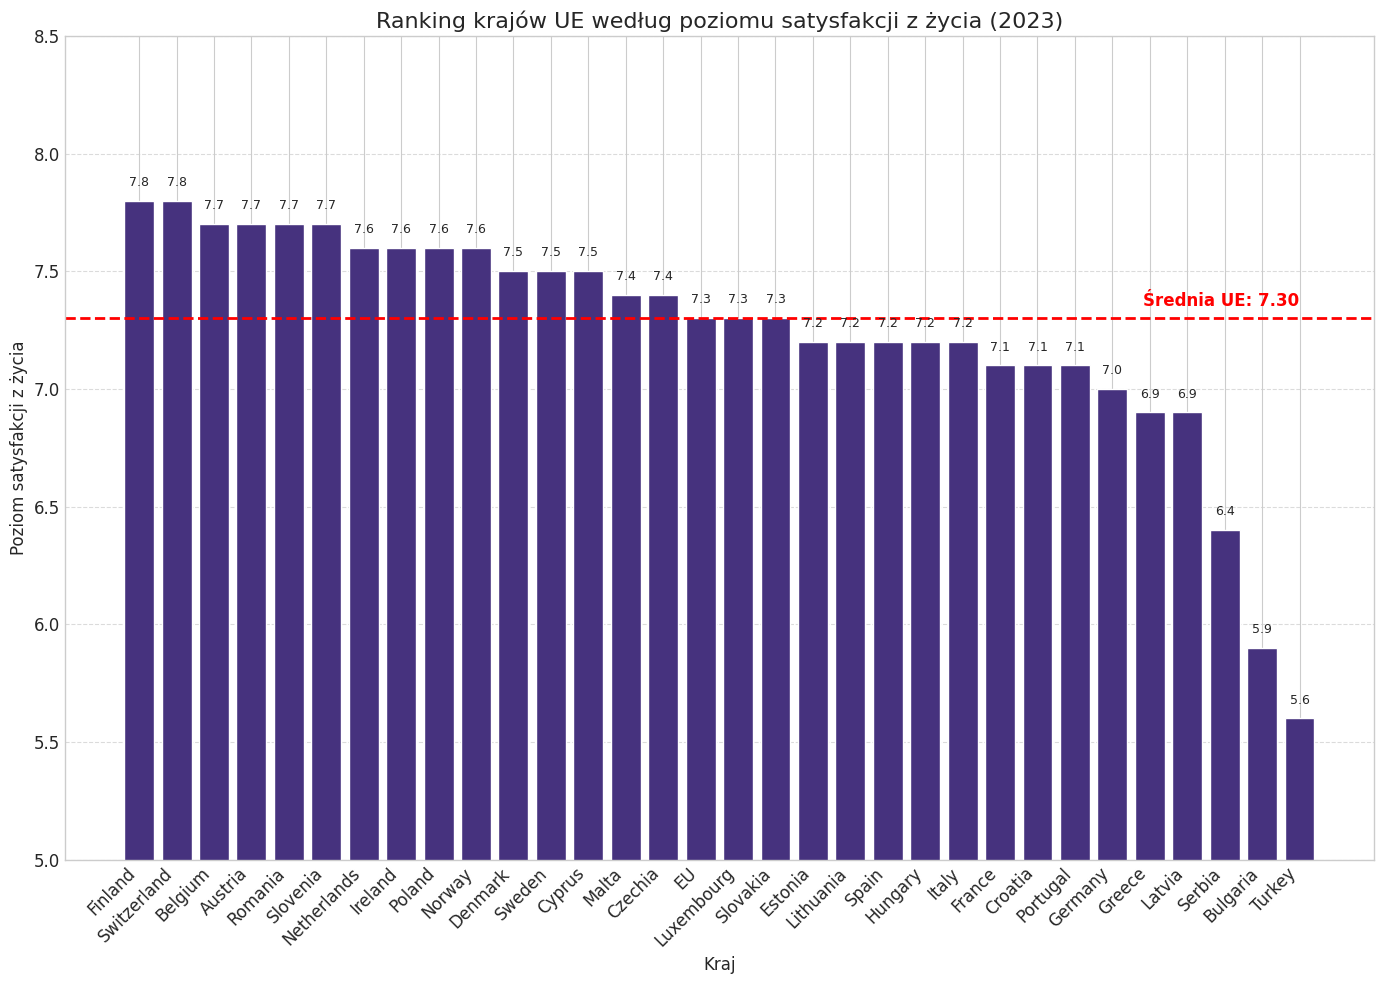

In [97]:
eu_value = df[df['country'] == 'EU']['general_2023'].values[0]
ranking = df[["country", "general_2023"]].sort_values('general_2023', ascending=False).reset_index(drop=True)

plt.figure(figsize=(14, 10))
bars = plt.bar(ranking['country'], ranking['general_2023'])
plt.axhline(y=eu_value, color='red', linestyle='--', linewidth=2)
plt.text(len(ranking) - 1, eu_value + 0.05, f'Średnia UE: {eu_value:.2f}', 
         horizontalalignment='right', color='red', fontweight='bold')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
plt.title('Ranking krajów UE według poziomu satysfakcji z życia (2023)', fontsize=16)
plt.xlabel('Kraj', fontsize=12)
plt.ylabel('Poziom satysfakcji z życia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(5, 8.5)
plt.tight_layout()

plt.show()

In [98]:
df = df[df['country'] != 'EU']

print("\nPodstawowe statystyki:")
print(df.describe())


Podstawowe statystyki:
       general_2013  general_2023       male     female      youth  \
count     31.000000     31.000000  31.000000  31.000000  31.000000   
mean       6.922581      7.248387   7.258065   7.229032   7.632258   
std        0.831749      0.509818   0.501181   0.521021   0.488117   
min        4.800000      5.600000   5.600000   5.700000   5.700000   
25%        6.450000      7.100000   7.150000   7.050000   7.450000   
50%        7.000000      7.300000   7.300000   7.200000   7.700000   
75%        7.500000      7.600000   7.600000   7.600000   7.900000   
max        8.000000      7.800000   7.800000   7.800000   8.300000   

       young_adults  middle_age  older_adult     senior    primary  secondary  \
count     31.000000   31.000000    31.000000  31.000000  31.000000  31.000000   
mean       7.441935    7.312903     7.132258   7.070968   6.854839   7.219355   
std        0.483580    0.474512     0.555810   0.735841   0.609830   0.487456   
min        5.600000  

# Statystyki opisowe

---

Analizując statystyki opisowe, możemy między innymi stwierdzić, że ogólny poziom satysfakcji z życia w UE:
* Wzrósł w latach 2013-2023
* W 2023 charakteryzuje się mniejszym zróżnicowaniem niż w roku 2013
* Jest na podobnym poziomie dla obu płci
* Średnio spada wraz z wiekiem
* Średnio wzrasta wraz z wykształceniem

W następnych krokach postaram się wyjaśnić powyższe zjawiska oraz potwierdzić ich zasadność obliczeniami.

In [99]:
time_comparison = df[['country', 'general_2013', 'general_2023']].copy()

time_comparison['change'] = time_comparison['general_2023'] - time_comparison['general_2013']

time_comparison_sorted = time_comparison.sort_values('change', ascending=False)

print("Porównanie satysfakcji z życia między 2013 a 2023:")
print(time_comparison_sorted)

t_stat, p_value = stats.ttest_rel(df['general_2013'], df['general_2023'])
print(f"\nWynik testu t dla prób zależnych:")
print(f"Statystyka t: {t_stat:.4f}")
print(f"Wartość p: {p_value:.4f}")

if p_value < 0.05:
    print("Istnieje statystycznie istotna różnica między poziomem satysfakcji z życia w latach 2013 i 2023.")
else:
    print("Nie ma statystycznie istotnej różnicy między poziomem satysfakcji z życia w latach 2013 i 2023.")


Porównanie satysfakcji z życia między 2013 a 2023:
        country  general_2013  general_2023  change
24       Serbia           5.0           6.4     1.4
4        Cyprus           6.2           7.5     1.3
2      Bulgaria           4.8           5.9     1.1
12      Hungary           6.1           7.2     1.1
22     Portugal           6.2           7.1     0.9
7       Estonia           6.5           7.2     0.7
11       Greece           6.2           6.9     0.7
26     Slovenia           7.0           7.7     0.7
3       Croatia           6.4           7.1     0.7
14        Italy           6.6           7.2     0.6
5       Czechia           6.9           7.4     0.5
16    Lithuania           6.7           7.2     0.5
23      Romania           7.2           7.7     0.5
15       Latvia           6.5           6.9     0.4
18        Malta           7.1           7.4     0.3
27        Spain           6.9           7.2     0.3
25     Slovakia           7.0           7.3     0.3
21       Pola

# 2013 vs 2023

---

### Średni poziom satysfakcji z życia
Test t Studenta wykazał statystycznie istotny wzrost średniego poziomu satysfakcji z życia w krajach UE między 2013 a 2023 rokiem (t = -3.5130, p = 0.0014, α = 0.05).

### Zmiana poziomu satysfakcji
Wykres pokazuje zróżnicowanie zmian satysfakcji z życia w krajach UE na przestrzeni dekady. Serbia, Cypr, Bułgaria i Węgry doświadczyły najwyższego wzrostu (powyżej 1 punktu). Natomiast kraje rozwinięte odnotowały spadki, z najgłębszym w Danii (-0.5 punktu).


### Średni poziom satysfakcji z życia w UE
Średni poziom satysfakcji z życia w UE wzrósł z 6.92 w 2013 roku do 7.25 w 2023 roku (+0.33 punktu / 4.8%). Mimo spadków w niektórych krajach, ogólna tendencja dla całej UE jest wyraźnie pozytywna, co świadczy o znaczącej poprawie jakości życia w krajach, które wcześniej miały niższe wskaźniki.


### Rozkład satysfakcji z życia
Rozkład satysfakcji z życia zmienił się znacząco na przestrzeni dekady - z wyraźnie dwumodalnego (2013) z wartościami maksymalnymi przy 6.5 i 7.5-8.0, na bardziej jednolity (2023) skupiony wokół przedziału 7.0-7.8. Wyraźnie zmniejszyła się liczba krajów z niskimi wskaźnikami (poniżej 6.5), przy utrzymującej się grupie krajów o wysokiej satysfakcji. Mniejsze rozproszenie danych w 2023 roku wskazuje na wyrównanie się poziomów satysfakcji i zmniejszenie nierówności w dobrostanie między krajami UE.

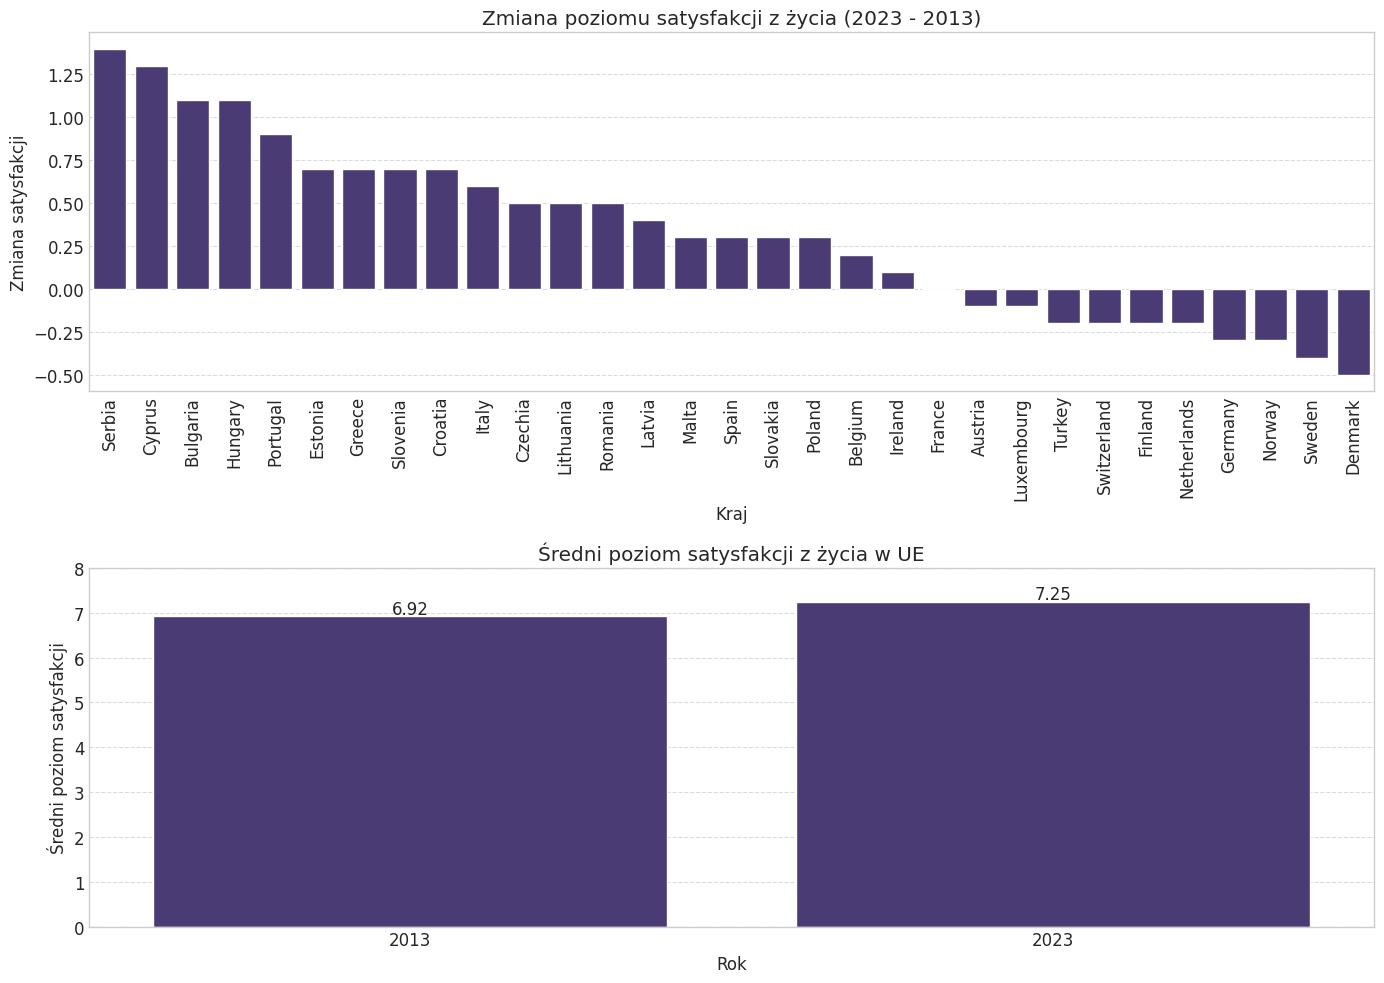

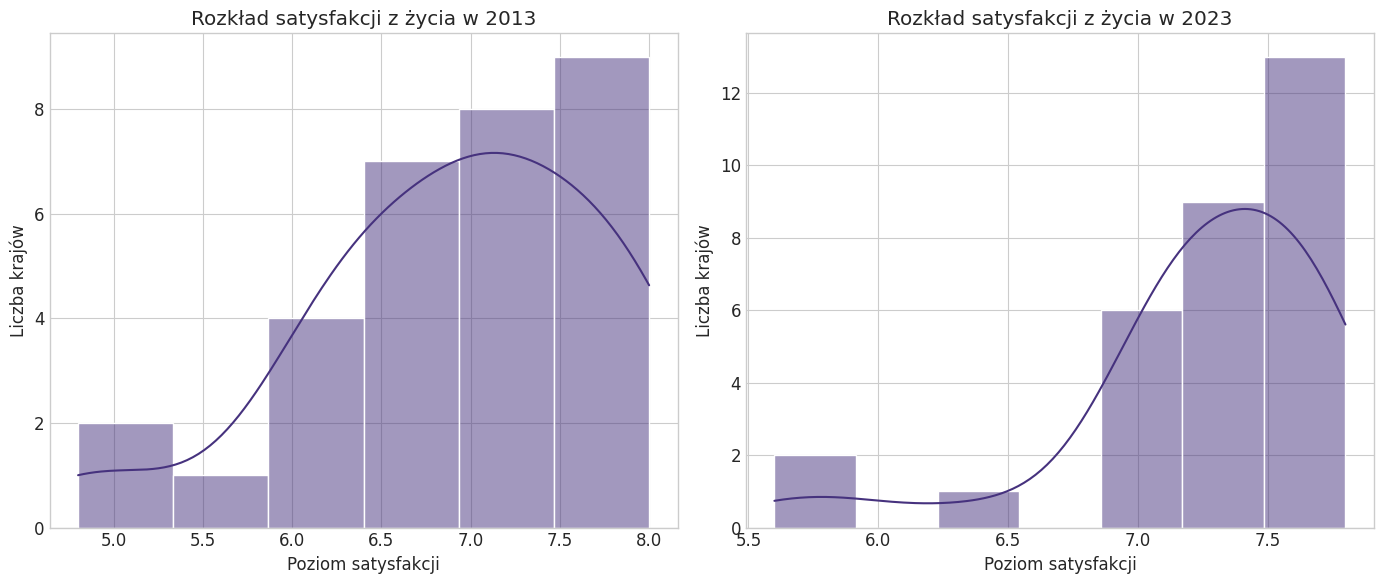

In [100]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='country', y='change', data=time_comparison_sorted)
plt.title('Zmiana poziomu satysfakcji z życia (2023 - 2013)')
plt.xlabel('Kraj')
plt.ylabel('Zmiana satysfakcji')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
mean_2013 = df['general_2013'].mean()
mean_2023 = df['general_2023'].mean()
years = ['2013', '2023']
means = [mean_2013, mean_2023]

sns.barplot(x=years, y=means)
plt.title('Średni poziom satysfakcji z życia w UE')
plt.xlabel('Rok')
plt.ylabel('Średni poziom satysfakcji')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(np.arange(0, 9))

for i, v in enumerate(means):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['general_2013'], kde=True)
plt.title('Rozkład satysfakcji z życia w 2013')
plt.xlabel('Poziom satysfakcji')
plt.ylabel('Liczba krajów')

plt.subplot(1, 2, 2)
sns.histplot(df['general_2023'], kde=True)
plt.title('Rozkład satysfakcji z życia w 2023')
plt.xlabel('Poziom satysfakcji')
plt.ylabel('Liczba krajów')

plt.tight_layout()
plt.show()

In [101]:
gender_data = pd.DataFrame({
    'Płeć': ['Mężczyźni'] * len(df) + ['Kobiety'] * len(df),
    'Satysfakcja': df['male'].tolist() + df['female'].tolist(),
    'Kraj': df['country'].tolist() + df['country'].tolist()
})

gender_model = ols('Satysfakcja ~ C(Płeć)', data=gender_data).fit()
gender_anova_table = sm.stats.anova_lm(gender_model, typ=2)
print("Wyniki ANOVA dla płci:")
print(gender_anova_table)

gender_tukey = pairwise_tukeyhsd(gender_data['Satysfakcja'], gender_data['Płeć'], alpha=0.05)
print("\nWyniki testu Tukeya dla płci:")
print(gender_tukey)

Wyniki ANOVA dla płci:
             sum_sq    df         F    PR(>F)
C(Płeć)    0.013065   1.0  0.049994  0.823834
Residual  15.679355  60.0       NaN       NaN

Wyniki testu Tukeya dla płci:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Kobiety Mężczyźni    0.029 0.8238 -0.2307 0.2888  False
-------------------------------------------------------


# Porównanie według płci

---

### Średni poziom satysfakcji z życia
Analiza wariancji (ANOVA) nie wykazała statystycznie istotnych różnic w poziomie satysfakcji z życia między kobietami a mężczyznami (F = 0.049994, p = 0.823834, α = 0.05). Test Tukeya potwierdził brak istotnych różnic (p-adj = 0.8238).

### Rozkład satysfakcji z życia według płci
Wykresy pudełkowe pokazują bardzo zbliżone rozkłady satysfakcji z życia dla obu płci, z podobnymi medianami z nieznacznie większymi rozstępami u kobiet. W obu grupach występują pojedyncze wartości odstające w dolnej części skali. Średni poziom satysfakcji jest niemal identyczny: 7.26 dla mężczyzn i 7.23 dla kobiet, co daje minimalną różnicę 0.03 punktu.

### Różnice między krajami
Wykres różnic między płciami w poszczególnych krajach pokazuje że różnice w poziomie satysfakcji z życia występują lokalnie, natomiast zmiany te nie są znaczące w spojrzeniu ogólnym.

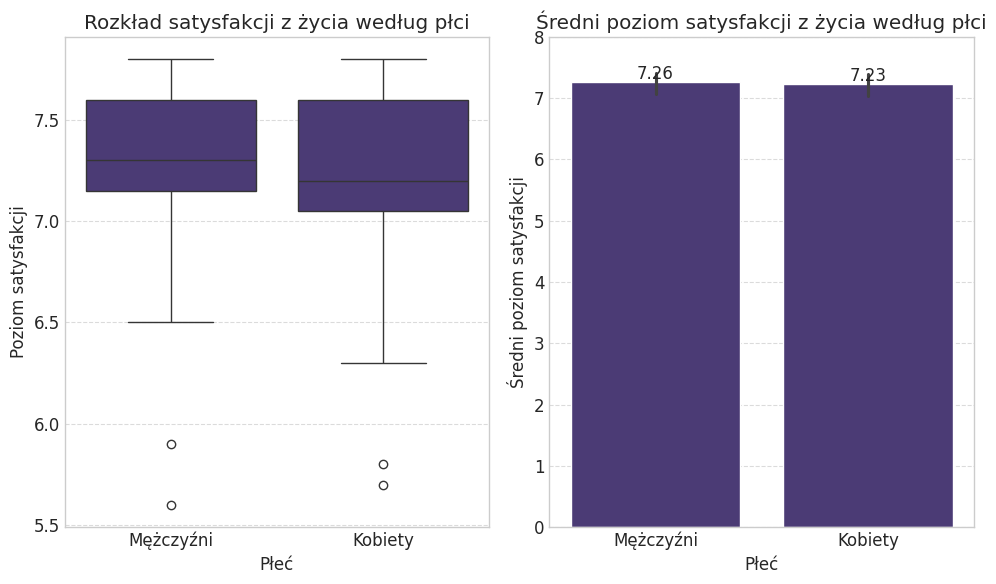

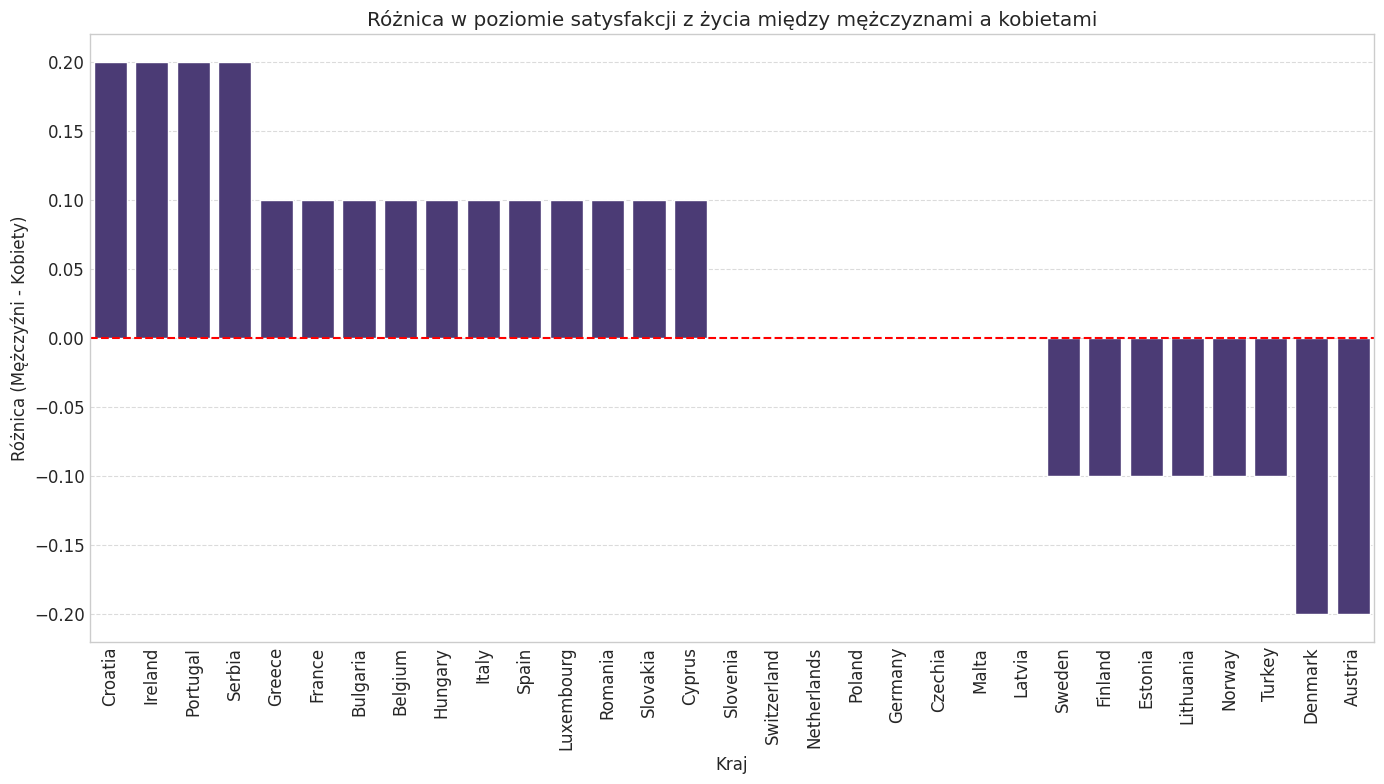

In [102]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Płeć', y='Satysfakcja', data=gender_data)
plt.title('Rozkład satysfakcji z życia według płci')
plt.xlabel('Płeć')
plt.ylabel('Poziom satysfakcji')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.barplot(x='Płeć', y='Satysfakcja', data=gender_data, ci=95, estimator=np.mean)
plt.title('Średni poziom satysfakcji z życia według płci')
plt.xlabel('Płeć')
plt.ylabel('Średni poziom satysfakcji')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(np.arange(0, 9))

for i, gender in enumerate(['Mężczyźni', 'Kobiety']):
    mean_val = gender_data[gender_data['Płeć'] == gender]['Satysfakcja'].mean()
    plt.text(i, mean_val + 0.05, f"{mean_val:.2f}", ha='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
gender_diff = df.copy()
gender_diff['Różnica (M-K)'] = df['male'] - df['female']
gender_diff_sorted = gender_diff.sort_values('Różnica (M-K)', ascending=False)

sns.barplot(x='country', y='Różnica (M-K)', data=gender_diff_sorted)
plt.title('Różnica w poziomie satysfakcji z życia między mężczyznami a kobietami')
plt.xlabel('Kraj')
plt.ylabel('Różnica (Mężczyźni - Kobiety)')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [103]:
age_columns = ['youth', 'young_adults', 'middle_age', 'older_adult', 'senior']
age_names = ['Młodzież', 'Młodzi dorośli', 'Wiek średni', 'Wiek starszy', 'Seniorzy']
age_mapping = dict(zip(age_columns, age_names))

age_data = pd.DataFrame({
    'Wiek': [age_mapping[col] for col in age_columns for _ in range(len(df))],
    'Satysfakcja': pd.concat([df[col] for col in age_columns]).tolist(),
    'Kraj': df['country'].tolist() * len(age_columns)
})

# Mixed model seems to be more useful here
# age_model = ols('Satysfakcja ~ C(Wiek)', data=age_data).fit()
# age_anova_table = sm.stats.anova_lm(age_model, typ=2)
# print("Wyniki ANOVA dla grup wiekowych:")
# print(age_anova_table)
# 
# age_tukey = pairwise_tukeyhsd(age_data['Satysfakcja'], age_data['Wiek'], alpha=0.05)
# print("\nWyniki testu Tukeya dla grup wiekowych:")
# print(age_tukey)

age_model = smf.mixedlm("Satysfakcja ~ C(Wiek)", 
                          data=age_data, 
                          groups=age_data["Kraj"])
age_model_result = age_model.fit()
print("\nWyniki liniowego modelu mieszanego dla grup wiekowych:")
print(age_model_result.summary())


Wyniki liniowego modelu mieszanego dla grup wiekowych:
              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    Satysfakcja
No. Observations:    155        Method:                REML       
No. Groups:          31         Scale:                 0.1057     
Min. group size:     5          Log-Likelihood:        -88.3798   
Max. group size:     5          Converged:             Yes        
Mean group size:     5.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                7.442    0.100 74.476 0.000  7.246  7.638
C(Wiek)[T.Młodzież]      0.190    0.083  2.304 0.021  0.028  0.352
C(Wiek)[T.Seniorzy]     -0.371    0.083 -4.492 0.000 -0.533 -0.209
C(Wiek)[T.Wiek starszy] -0.310    0.083 -3.749 0.000 -0.472 -0.148
C(Wiek)[T.Wiek średni

# Porównanie grup wiekowych

---

### Średni poziom satysfakcji z życia
Model efektów mieszanych wykazał statystycznie istotne różnice w poziomie satysfakcji z życia między grupami wiekowymi. W porównaniu do młodych dorosłych, młodzież wykazuje wyższy poziom satysfakcji (+0.190, p=0.021), natomiast seniorzy (-0.371, p<0.001) i osoby w wieku starszym (-0.310, p<0.001) znacząco niższy. Różnica dla wieku średniego (-0.129, p=0.118) nie jest statystycznie istotna.

### Rozkład satysfakcji z życia według wieku
Wykresy pudełkowe pokazują systematyczny spadek satysfakcji życiowej wraz z wiekiem - od najwyższego u młodzieży (7.63), przez młodych dorosłych (7.44), aż do najniższego u seniorów (7.07). Grupa seniorów wyróżnia się szczególnie szerokim rozstępem wartości, co wskazuje na znaczne zróżnicowanie satysfakcji w tej populacji. We wszystkich grupach występują pojedyncze wartości odstające, głównie w dolnym zakresie skali.

### Różnice między grupami wiekowymi
Macierz odległości między grupami wiekowymi uwidacznia wyraźny gradient spadku poziomu satysfakcji z życia wraz z wiekiem. Największa różnica (0.56 punktu) występuje między młodzieżą a seniorami. Różnice stają się stopniowo mniejsze między sąsiadującymi grupami wiekowymi. Zjawisko to może odzwierciedlać zarówno czynniki biologiczne (zdrowie), jak i społeczno-ekonomiczne (zmiany w statusie zawodowym, sytuacji rodzinnej).

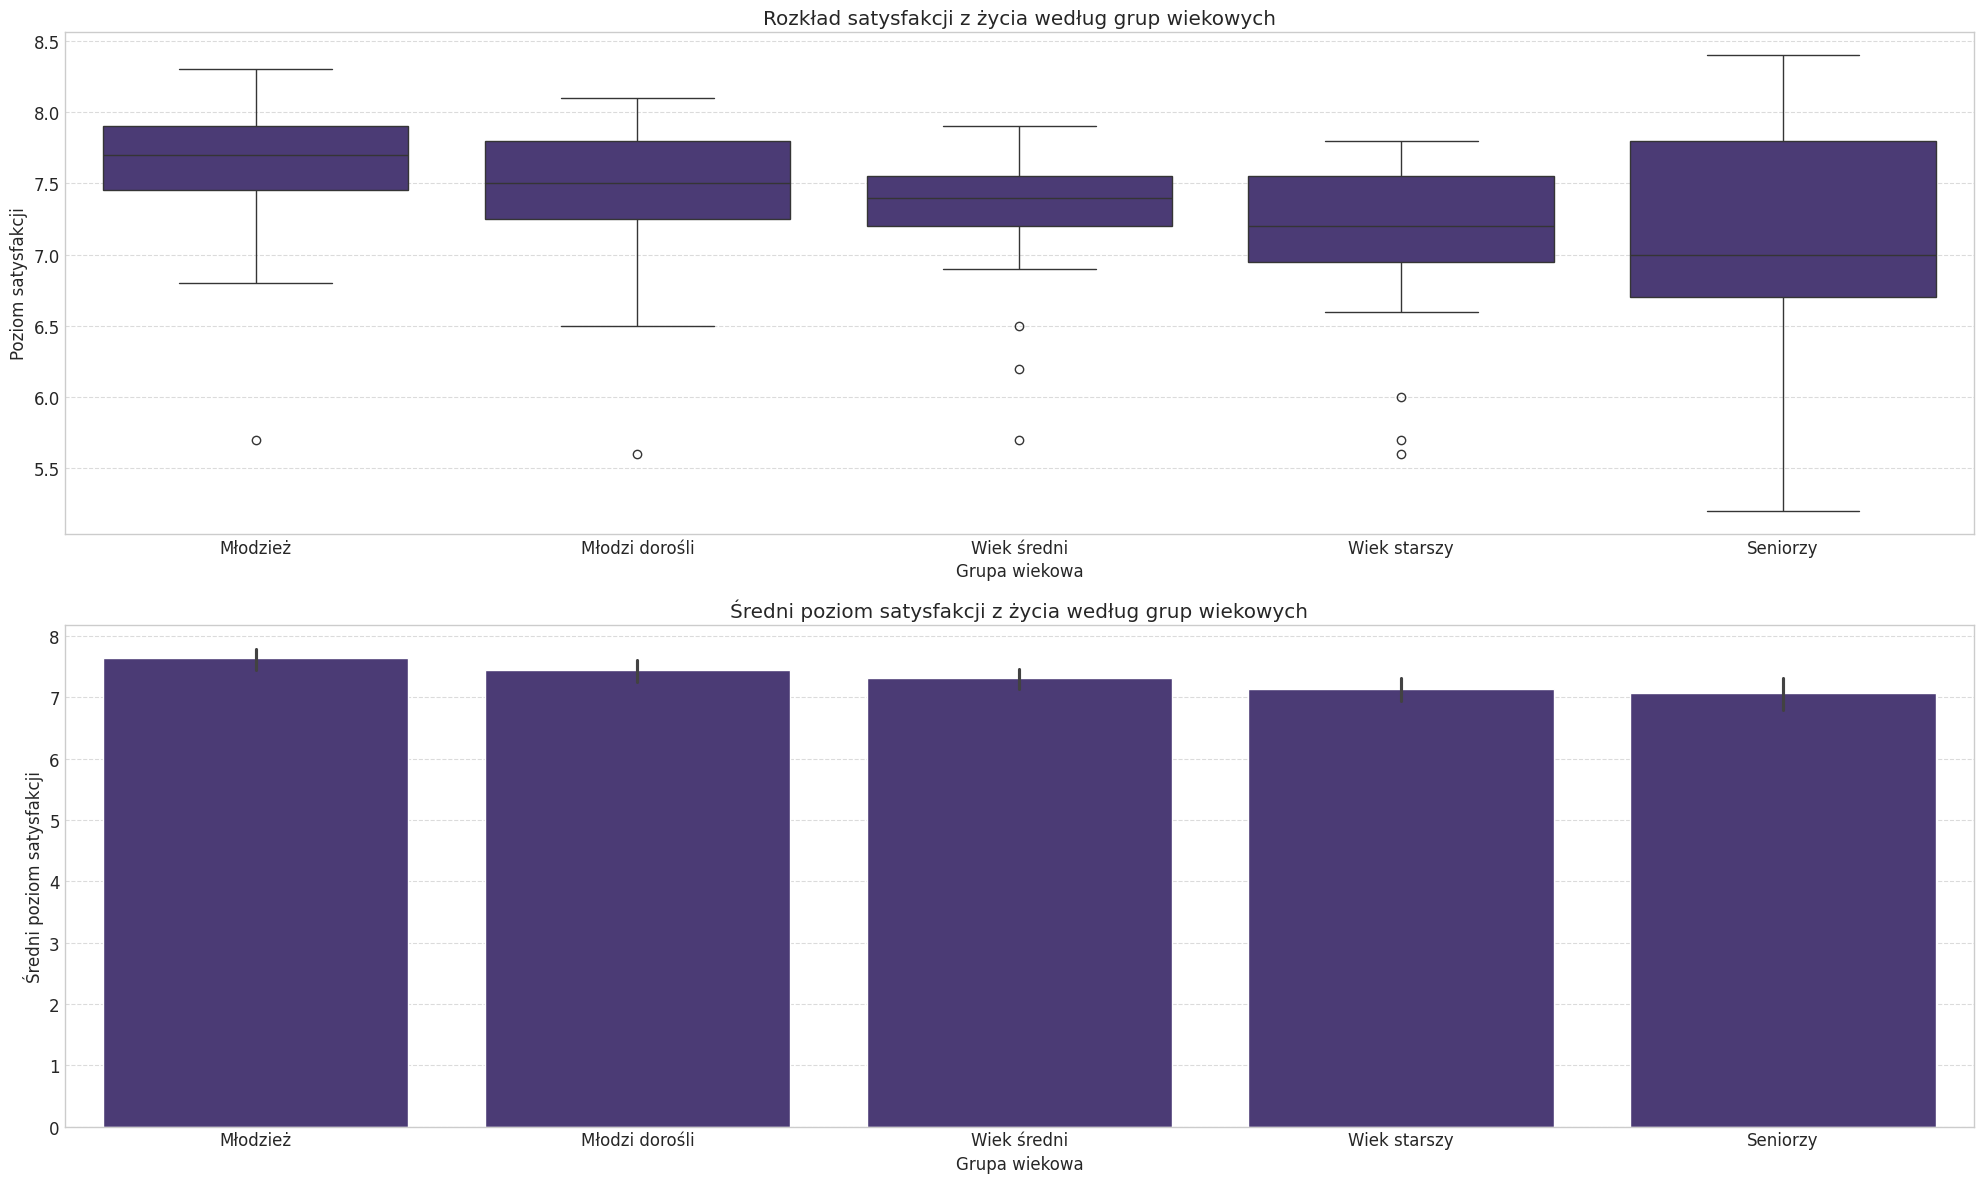

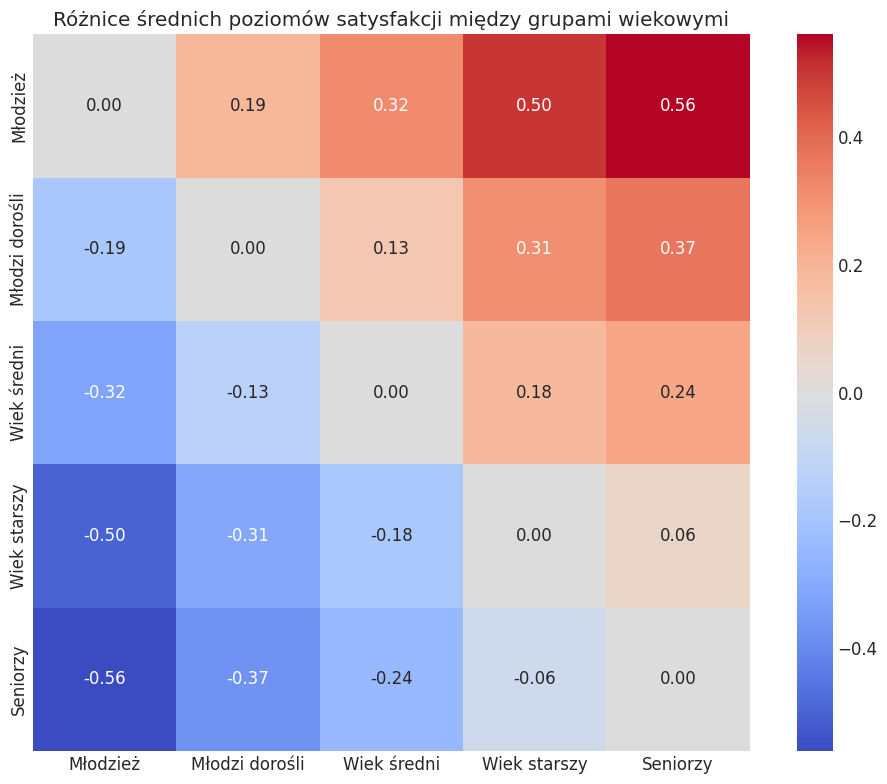

In [104]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
sns.boxplot(x='Wiek', y='Satysfakcja', data=age_data)
plt.title('Rozkład satysfakcji z życia według grup wiekowych')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Poziom satysfakcji')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
sns.barplot(x='Wiek', y='Satysfakcja', data=age_data, ci=95, estimator=np.mean)
plt.title('Średni poziom satysfakcji z życia według grup wiekowych')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Średni poziom satysfakcji')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(np.arange(0, 9))

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))

age_means = age_data.groupby('Wiek')['Satysfakcja'].mean()

age_diff = pd.DataFrame(0, index=age_names, columns=age_names)
for i, age1 in enumerate(age_names):
    for j, age2 in enumerate(age_names):
        if age1 in age_means.index and age2 in age_means.index:
            age_diff.loc[age1, age2] = age_means[age1] - age_means[age2]

sns.heatmap(age_diff, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Różnice średnich poziomów satysfakcji między grupami wiekowymi')
plt.tight_layout()
plt.show()

In [105]:
edu_columns = ['primary', 'secondary', 'tertiary']
edu_names = ['Wykształcenie Podstawowe', 'Wykształcenie średnie', 'Wykształcenie wyższe']
edu_levels = ['Podstawowe', 'Średnie', 'Wyższe']
edu_mapping = dict(zip(edu_columns, edu_names))

edu_data = pd.DataFrame({
    'Wykształcenie': [edu_mapping[col] for col in edu_columns for _ in range(len(df))],
    'Satysfakcja': pd.concat([df[col] for col in edu_columns]).tolist(),
    'Kraj': df['country'].tolist() * len(edu_columns)
})

edu_data['Wykształcenie'] = edu_data['Wykształcenie'].replace({
    'Wykształcenie Podstawowe': 'Podstawowe',
    'Wykształcenie średnie': 'Średnie',
    'Wykształcenie wyższe': 'Wyższe'
})

edu_model = ols('Satysfakcja ~ C(Wykształcenie)', data=edu_data).fit()
edu_anova_table = sm.stats.anova_lm(edu_model, typ=2)
print("Wyniki ANOVA dla poziomów wykształcenia:")
print(edu_anova_table)

edu_tukey = pairwise_tukeyhsd(edu_data['Satysfakcja'], edu_data['Wykształcenie'], alpha=0.05)
print("\nWyniki testu Tukeya dla poziomów wykształcenia:")
print(edu_tukey)

Wyniki ANOVA dla poziomów wykształcenia:
                     sum_sq    df          F    PR(>F)
C(Wykształcenie)   8.683226   2.0  15.759133  0.000001
Residual          24.794839  90.0        NaN       NaN

Wyniki testu Tukeya dla poziomów wykształcenia:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2 meandiff p-adj   lower   upper  reject
---------------------------------------------------------
Podstawowe  Wyższe   0.7484    0.0  0.4307  1.0661   True
Podstawowe Średnie   0.3645 0.0204  0.0468  0.6822   True
    Wyższe Średnie  -0.3839 0.0137 -0.7016 -0.0662   True
---------------------------------------------------------


# Porównanie według wykształcenia

---

### Średni poziom satysfakcji z życia
Analiza wariancji (ANOVA) wykazała wysoce istotne statystycznie różnice w poziomie satysfakcji z życia między grupami o różnym poziomie wykształcenia (F = 15.759, p = 0.000001). Test Tukeya potwierdził istotne różnice między wszystkimi trzema poziomami wykształcenia - podstawowym i wyższym (różnica 0.75, p < 0.001), podstawowym i średnim (różnica 0.36, p = 0.020), oraz średnim i wyższym (różnica 0.38, p = 0.014).

### Rozkład satysfakcji z życia według wykształcenia
Pierwsze dwa wykresy pokazują wyraźny wzrost satysfakcji życiowej wraz z poziomem wykształcenia. Najniższy poziom obserwujemy wśród osób z wykształceniem podstawowym (6.85), wyższy i bardziej skoncentrowany u osób z wykształceniem średnim (7.22), a najwyższy u osób z wykształceniem wyższym (7.60). Widoczne jest również stopniowe zmniejszanie się rozstępu wartości - osoby z wyższym wykształceniem charakteryzują się bardziej jednolitym poziomem satysfakcji. We wszystkich grupach występują pojedyncze wartości odstające, głównie w dolnym zakresie skali.

### Różnice między krajami
Wykres porównujący satysfakcję według wykształcenia w poszczególnych krajach UE potwierdza, że zaobserwowany wzorzec występuje praktycznie we wszystkich państwach członkowskich, choć z różnym nasileniem. Osoby z wyższym wykształceniem konsekwentnie raportują wyższy poziom satysfakcji niż osoby z wykształceniem podstawowym.

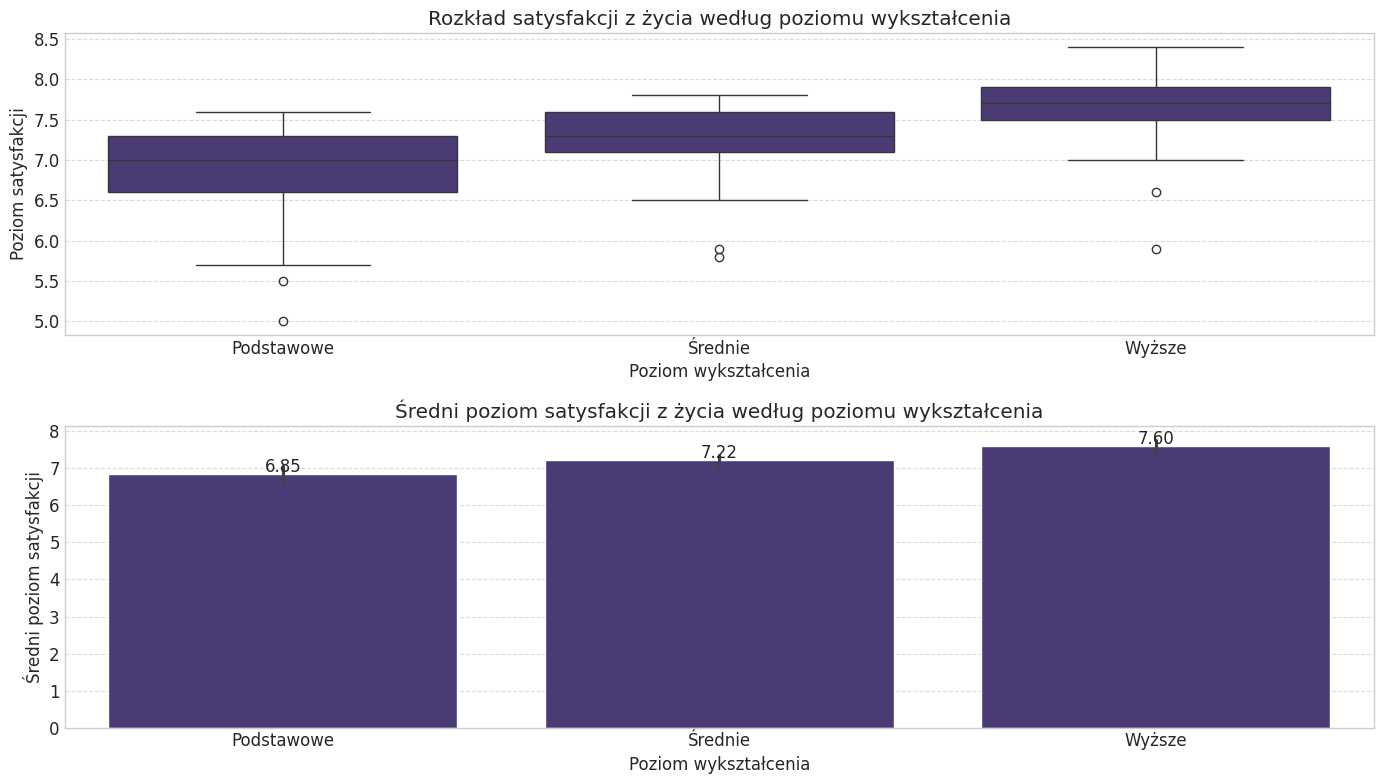

<Figure size 1200x600 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

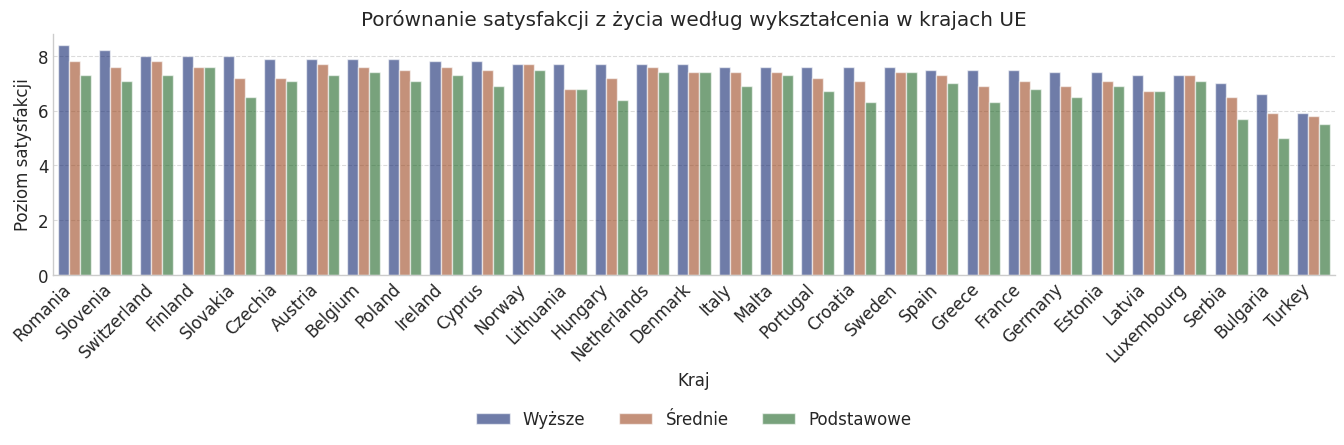

In [106]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x='Wykształcenie', y='Satysfakcja', data=edu_data, order=edu_levels)
plt.title('Rozkład satysfakcji z życia według poziomu wykształcenia')
plt.xlabel('Poziom wykształcenia')
plt.ylabel('Poziom satysfakcji')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
sns.barplot(x='Wykształcenie', y='Satysfakcja', data=edu_data, ci=95, estimator=np.mean, 
            order=edu_levels)
plt.title('Średni poziom satysfakcji z życia według poziomu wykształcenia')
plt.xlabel('Poziom wykształcenia')
plt.ylabel('Średni poziom satysfakcji')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, edu_level in enumerate(edu_levels):
    mean_val = edu_data[edu_data['Wykształcenie'] == edu_level]['Satysfakcja'].mean()
    plt.text(i, mean_val + 0.05, f"{mean_val:.2f}", ha='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

edu_means = [edu_data[edu_data['Wykształcenie'] == level]['Satysfakcja'].mean() for level in edu_levels]

plt.figure(figsize=(14, 10))

edu_country_data = edu_data.sort_values('Satysfakcja', ascending=False)

g = sns.catplot(
    data=edu_country_data, kind="bar",
    x="Kraj", y="Satysfakcja", hue="Wykształcenie",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set(title='Porównanie satysfakcji z życia według wykształcenia w krajach UE')
g.set(xlabel="Kraj", ylabel='Poziom satysfakcji')

g._legend.remove()
plt.legend(
    bbox_to_anchor=(0.5, -0.5),
    loc='upper center',
    ncol=3,
    frameon=False,
    title=None
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

In [107]:
df['median_income_pps'] = pd.to_numeric(df['median_income_pps'], errors='coerce')

correlation, p_value = stats.pearsonr(df['median_income_pps'], df['general_2023'])
print(f"Korelacja Pearsona: {correlation:.4f}")
print(f"Wartość p: {p_value:.4f}")

spearman_corr, spearman_p = stats.spearmanr(df['median_income_pps'], df['general_2023'])
print(f"Korelacja Spearmana: {spearman_corr:.4f}")
print(f"Wartość p: {spearman_p:.4f}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df['median_income_pps'], df['general_2023'])
print(f"Współczynnik determinacji (R^2): {r_value**2:.4f}")
print(f"Równanie regresji: satysfakcja = {slope:.6f} * dochód + {intercept:.4f}")

Korelacja Pearsona: 0.6101
Wartość p: 0.0003
Korelacja Spearmana: 0.5943
Wartość p: 0.0004
Współczynnik determinacji (R^2): 0.3722
Równanie regresji: satysfakcja = 0.000045 * dochód + 6.4029


# Jak zarobki wpływają na poziom satysfkacji z życia w UE?

---

### Siła związku między dochodem a satysfakcją z życia

Przeprowadzona analiza korelacji wykazała istnienie umiarkowanie silnego, dodatniego związku między medianą wynagrodzeń a poziomem satysfakcji z życia w krajach Unii Europejskiej (korelacja Pearsona: 0.6101, p < 0.001). Oznacza to, że wyższy poziom dochodów jest w pewnym stopniu powiązany z wyższym poziomem satysfakcji życiowej. Podobna wartość korelacji Spearmana (0.5943, p < 0.001) potwierdza stabilność tej zależności.

### Dochód jako determinanta satysfakcji

Współczynnik determinacji (R² = 0.3722) wskazuje, że różnice w poziomie dochodów wyjaśniają około 37% zmienności w ogólnej satysfakcji z życia między krajami europejskimi. Oznacza to, że chociaż dochód jest wpływowym czynnikiem, to ponad 60% różnic w poziomie satysfakcji jest determinowanych przez inne czynniki.

### Szczegółowa zależność

Równanie regresji (satysfakcja = 0.000045 * dochód + 6.4029) pozwala oszacować, że wzrost mediany wynagrodzenia rocznego o 10,000 PPS wiąże się ze wzrostem poziomu satysfakcji o około 0.45 punktu. Wartość bazowa 6.4 może być interpretowana jako "podstawowy" poziom satysfakcji niezależny od dochodów.

### Interesujące przypadki krajów

Wykres pokazuje kilka interesujących odstępstw od ogólnego trendu:

- **Pozytywne odstępstwa**: Rumunia, Polska, Czechy i Słowenia charakteryzują się poziomem satysfakcji wyższym niż przewidywałby ich poziom dochodów, co sugeruje silny wpływ czynników pozaekonomicznych.

- **Negatywne odstępstwa**: Francja, Niemcy, Bułgaria i Turcja wykazują poziom satysfakcji niższy niż wynikałoby to z ich mediany wynagrodzeń. Co również może stanowić o mniejszym wpływie wynagrodzenia na poziom satysfakcji w tych krajach.

- **Przypadek Luksemburgu**: Pomimo najwyższych dochodów, poziom satysfakcji jest nieproporcjonalnie niski w porównaniu z krajami o podobnym statusie ekonomicznym.

### Wnioski końcowe

Analiza potwierdza istotną rolę czynników ekonomicznych w kształtowaniu dobrostanu społeczeństw, jednocześnie wskazując na złożoność zjawiska satysfakcji z życia. Umiarkowana wartość współczynnika determinacji przypomina, że "pieniądze szczęścia nie dają" nie jest całkowicie błędnym powiedzeniem - stanowią one ważny, ale niewystarczający warunek wysokiej jakości życia.


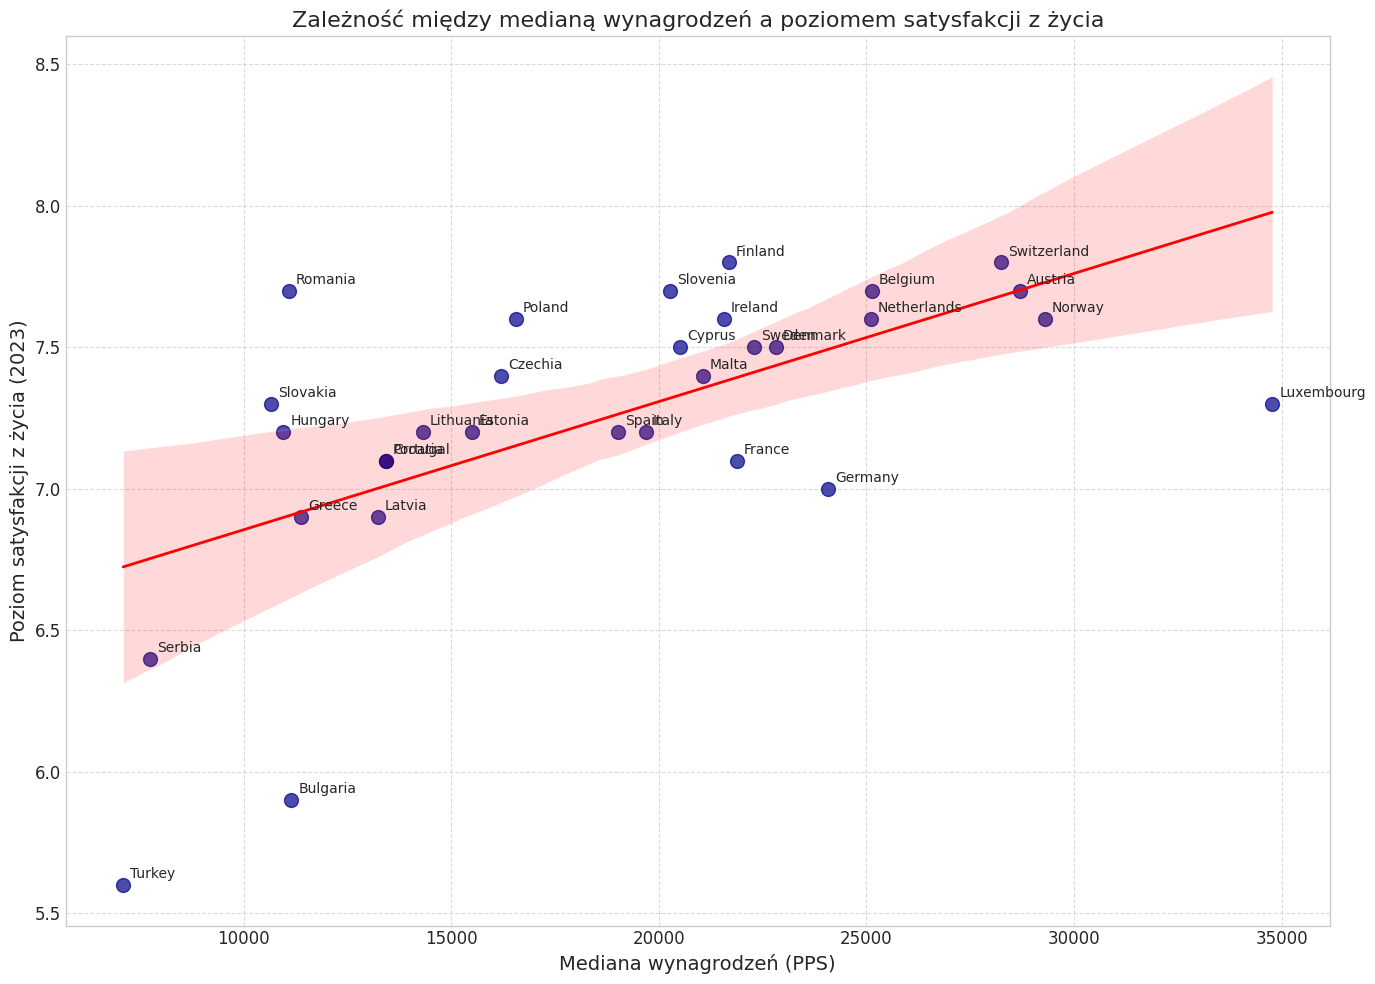

In [108]:
plt.figure(figsize=(14, 10))
sns.regplot(x='median_income_pps', y='general_2023', data=df, 
           scatter_kws={'alpha':0.7, 's':100, 'color':'darkblue'}, 
           line_kws={'color':'red', 'linewidth':2})

for i, row in df.iterrows():
    plt.annotate(row['country'], (row['median_income_pps'], row['general_2023']), 
                xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.title('Zależność między medianą wynagrodzeń a poziomem satysfakcji z życia', fontsize=16)
plt.xlabel('Mediana wynagrodzeń (PPS)', fontsize=14)
plt.ylabel('Poziom satysfakcji z życia (2023)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Podsumowanie analizy satysfakcji z życia w krajach UE

## Główne ustalenia

Przeprowadzona analiza danych Eurostatu dotyczących satysfakcji z życia w krajach Unii Europejskiej pozwoliła na zidentyfikowanie szeregu istotnych wzorców i zależności. Oto kluczowe wnioski po przeprowadzeniu badania:

### 1. Zmiany w czasie (2013-2023)
- **Istotny statystyczny wzrost** średniego poziomu satysfakcji z życia w UE z 6.92 do 7.25.
- Wyraźny **podział gospodarczy**: kraje rozwijające się odnotowały największe wzrosty, podczas gdy kraje rozwinięte doświadczyły spadków.
- **Konwergencja poziomów satysfakcji** - zmniejszenie rozpiętości między krajami i bardziej jednolity rozkład w 2023 roku

### 2. Wpływ czynników demograficznych - wnioski

**Płeć:**
- Brak istotnych statystycznie różnic między kobietami a mężczyznami 

**Wiek:**
- Silny, istotny statystycznie spadek satysfakcji wraz z wiekiem
- Młodzież wykazuje najwyższy poziom satysfakcji (7.63), seniorzy najniższy (7.07)
- Grupa seniorów charakteryzuje się największym zróżnicowaniem, podczas gdy inne grupy wiekowe cechują znacznie bardziej skoncentrowane wartości

**Wykształcenie:**
- Bardzo istotne statystycznie różnice między wszystkimi poziomami wykształcenia
- Wyraźny wzrost satysfakcji wraz z poziomem wykształcenia: podstawowe (6.85), średnie (7.22), wyższe (7.60)
- Wzorzec ten jest uniwersalny we wszystkich krajach UE, choć z różnym natężeniem
- Osoby z wyższym wykształceniem wykazują bardziej jednolity poziom satysfakcji

### 3. Wpływ czynników ekonomicznych
- Umiarkowanie silna korelacja między medianą wynagrodzeń a poziomem satysfakcji
- Dochód wyjaśnia około 37% zmienności w poziomie satysfakcji
- Wzrost dochodu o 10,000 PPS wiąże się z przeciętnym wzrostem satysfakcji o 0.45 punktu
- Wyraźne pozytywne odstępstwa od trendu w niektórych krajach (Rumunia, Polska, Czechy) [niższe zarobki, ale wyższy poziom satysfakcji]
- Negatywne odstępstwa w innych (Francja, Niemcy, Luksemburg) [wyższe zarobki, ale niższy poziom satysfakcji]

## Wnioski końcowe

1. **Postępująca konwergencja** - różnice w poziomie satysfakcji między krajami UE zmniejszają się, co może wskazywać na polepszanie się sytuacji państw biedniejszych

2. **Wielowymiarowość satysfakcji z życia** - choć wynagrodzenie jest istotne (wyjaśniają ~37% zmienności), większość różnic wynika z innych czynników

3. **Znaczenie wykształcenia** - stanowi ono silniejszy predyktor satysfakcji niż płeć czy nawet wiek, co podkreśla rolę edukacji w kształtowaniu dobrostanu

4. **Wyzwania demograficzne** - niższy poziom satysfakcji wśród seniorów, przy jednoczesnym starzeniu się społeczeństw europejskich, może stanowić wyzwanie dla przyszłego dobrostanu

5. **Równy poziom satysfakcji u kobiet i u mężczyzn** - pomimo lokalnych różnic w poszczególnych krajach, na poziomie całej UE zarówno kobiety jak i mężczyźni deklarują niemal identyczny poziom ogólnego dobrostanu, co sugeruje, że płeć sama w sobie nie jest determinantą poczucia satysfakcji z życia w europejskim kontekście społeczno-kulturowym.

Badanie to potwierdza złożoność zjawiska satysfakcji z życia i wskazuje na potrzebę kompleksowego podejścia do polityk mających na celu poprawę jakości życia obywateli UE.